<a href="https://colab.research.google.com/github/qwertyqwertyqwertyqwerty123/colab_projects/blob/main/pca_novichok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None

Количество пропущенных значений:
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


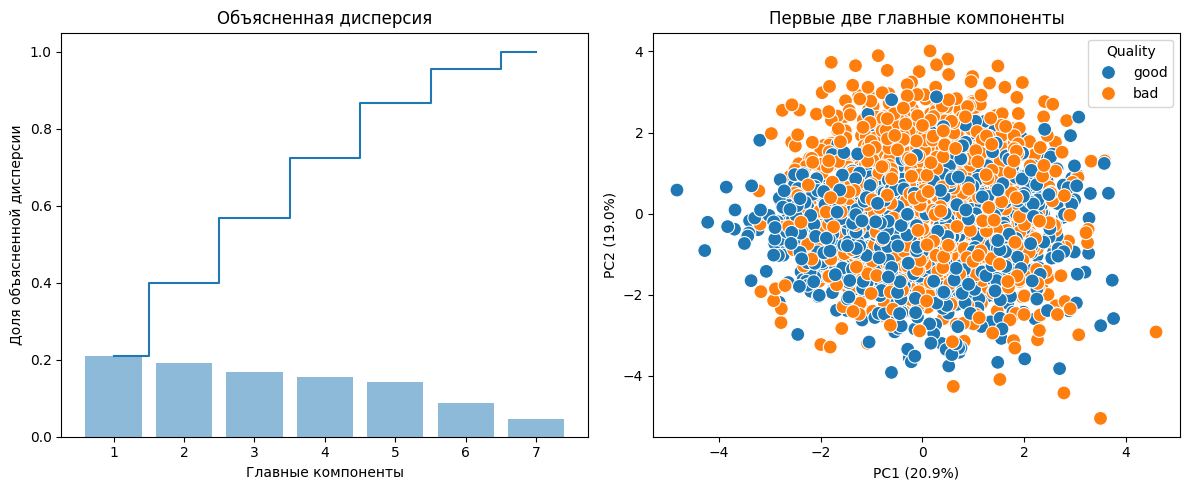


Нагрузки признаков на главные компоненты:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
A_id,-0.060515,0.038753,0.028266,-0.074464,0.994118,-0.016364,0.014284
Size,0.694925,-0.067519,-0.311281,0.493560,0.052724,-0.337965,0.235101
Weight,-0.110832,-0.290564,0.879689,0.241661,-0.010891,0.057562,0.260488
Sweetness,-0.650762,-0.427754,-0.377076,-0.332543,-0.047555,-0.238320,0.286280
Crunchiness,0.554686,-0.526669,-0.185692,-0.343918,0.027128,0.497855,0.117627
Juiciness,-0.473213,0.116608,-0.361954,0.662377,0.038542,0.428391,0.089239
Ripeness,0.098082,0.876945,0.018937,-0.335469,-0.055509,0.119562,0.302198


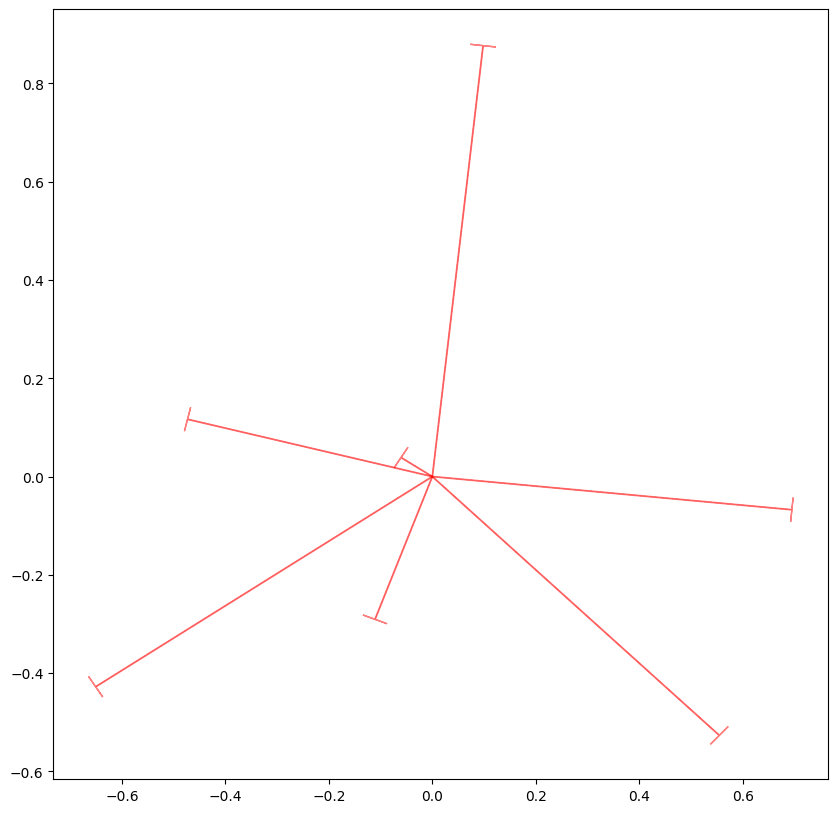

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

# Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/apple_quality.csv')

# Нач инф о данных
print("Информация о данных:")
print(df.info())
print("\nКоличество пропущенных значений:")
print(df.isna().sum())

# Только числовые столбцы
numeric_cols = df.select_dtypes(include=['number']).columns
X = df[numeric_cols]


# Удаление пустых срок и замена средним
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components,
                     columns=[f'PC{i+1}' for i in range(X.shape[1])])

# Целевая переменная (качество)
if 'Quality' in df.columns:
    pca_df['Quality'] = df['Quality']



#Визуализация результатов
plt.figure(figsize=(12, 5))

# График объясненной дисперсии
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_,
        alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')
plt.ylabel('Доля объясненной дисперсии')
plt.xlabel('Главные компоненты')
plt.title('Объясненная дисперсия')

# Диаграмма рассеяния
plt.subplot(1, 2, 2)
if 'Quality' in pca_df.columns:
    sns.scatterplot(x='PC1', y='PC2', hue='Quality', data=pca_df, s=100)
else:
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Первые две главные компоненты')
plt.tight_layout()
plt.show()

# Анализ нагрузок
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings,
                         columns=[f'PC{i+1}' for i in range(X.shape[1])],
                         index=X.columns)

print("\nНагрузки признаков на главные компоненты:")
display(loadings_df)

# Визуализация нагрузок
plt.figure(figsize=(10, 10))
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5,
             head_width=0.05, head_length=0)

ВЫВОД: На графике объясненной дисперсии видно, что при использовании 3 главных компонент детерминация достигает 60%, а при 4 -- почти 80%. Понятно, что если в датасете изначально 7 факторов, нет смысла их сокращать до 4. Но, например, если факторы сильно коррелируют, можно в данном случае использовать 3 фактора.
